## FakeReal 1.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import re
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
newsu = pd.read_csv('newsu.tsv').drop("Unnamed: 0", axis = 1)
newsu.head(3)

,title,text,tag,date,author,url,rating,tagenc,text_processed
0,Weintraub diz que alunos inscritos decidirão d...,horar anunciar pesquisar aluno inscrito enem o...,saúde,2020-05,educacao,educacao.uol.com.br,1.0,6,"['hor', 'anunc', 'pesquis', 'alun', 'inscrit',..."
1,Segunda dose da CoronaVac não está relacionada...,dose escalonar comum programar vacinação e ser...,saúde,2021-01,Comprova,projetocomprova.com.br,0.0,6,"['escalon', 'comum', 'program', 'vacin', 'serv..."
2,Prisão na CPI é suco de Brasil onde as leis v...,o ex diretor logístico ministério saudar rober...,brasil,2021-07,noticias,noticias.uol.com.br,0.0,0,"['ex', 'diretor', 'logíst', 'ministéri', 'saud..."


In [3]:
messages = newsu.copy()
messages.reset_index(inplace = True)

In [4]:
y = messages['rating']
X = messages.drop('rating', axis = 1)
X = 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X['text_processed'], y, test_size = 0.33,random_state = 0)

In [6]:
print(f' X_train: {X_train.shape}')
print(f' y_train: {y_train.shape}')
print(f' X_test: {X_test.shape}')
print(f' y_test: {y_test.shape}')

 X_train: (7310,)
 y_train: (7310,)
 X_test: (3601,)
 y_test: (3601,)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [8]:
pip_count_nb = Pipeline([('vec', CountVectorizer()), ('clf_multi_nb', MultinomialNB(alpha = 0.001))])
pip_count_svm = Pipeline([('vec', CountVectorizer()), ('clf_svm_linear', LinearSVC(C = 0.5, max_iter = 100000))])
pip_tfidf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf_multi_nb', MultinomialNB(alpha = 0.001))])
pip_tfidf_svm = Pipeline([('tfidf', TfidfVectorizer()), ('clf_svm_linear', LinearSVC(C = 3.0))])

In [9]:
#------------Best parameters alpha for MultinomialNB------------#

param_grid = {'clf_multi_nb__alpha': [0.001, 0.01, 0.1]}
param_grid = {'clf_multi_nb__alpha': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pip_count_nb, param_grid)
grid = GridSearchCV(pip_tfidf_nb, param_grid)

grid.fit(X_train.values, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

0.892202462380301
Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf_multi_nb', MultinomialNB(alpha=0.1))])


In [10]:
#------------Best parameters C for LinearSVC------------#

param_grid = {'clf_svm_linear__C': [0.5, 1.0, 1.5]}
param_grid = {'clf_svm_linear__C': [1.5, 2.5, 3.0, 3.5]}

grid = GridSearchCV(pip_count_svm, param_grid)
grid = GridSearchCV(pip_tfidf_svm, param_grid)

grid.fit(X_train.values, y_train)

print(grid.best_score_)
print(grid.best_estimator_)

0.9240766073871409
Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf_svm_linear', LinearSVC(C=1.5))])


              precision    recall  f1-score   support

        Real       0.90      0.86      0.88      1766
        Fake       0.87      0.91      0.89      1835

    accuracy                           0.89      3601
   macro avg       0.89      0.89      0.89      3601
weighted avg       0.89      0.89      0.89      3601



C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


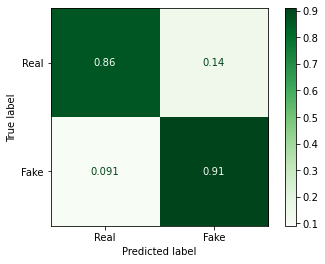

In [11]:
#Pipelines
# Dict for comparison of accuracy
accuracy = {}
#CountVectorizer and multinomialNB
pip_count_nb.fit(X_train.values, y_train)
y_pred_count_nb = pip_count_nb.predict(X_test.values)

# Classification report
print(classification_report(y_test, y_pred_count_nb, target_names = ['Real', 'Fake']))

# Confusion matrix
plot_confusion_matrix(pip_count_nb, X_test.values, y_test, display_labels = ['Real', 'Fake'],
                      normalize = 'true', cmap=plt.cm.Greens);
# Score
accuracy['countVectorizer_multinomialNB'] = accuracy_score(y_pred_count_nb, y_test)

              precision    recall  f1-score   support

        real       0.90      0.91      0.91      1766
        fake       0.91      0.91      0.91      1835

    accuracy                           0.91      3601
   macro avg       0.91      0.91      0.91      3601
weighted avg       0.91      0.91      0.91      3601



C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


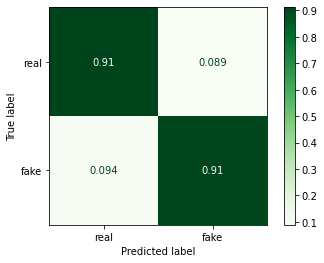

In [12]:
#CountVectorizer and linearSVC
pip_count_svm.fit(X_train.values, y_train)
y_pred_count_svm = pip_count_svm.predict(X_test.values)

# Classification report
print(classification_report(y_test, y_pred_count_svm, target_names = ['real', 'fake']))
# Confusion matrix
plot_confusion_matrix(pip_count_svm, X_test.values, y_test, display_labels = ['real', 'fake'], 
                      normalize = 'true', cmap=plt.cm.Greens);
# Score
accuracy['countVectorizer_linearSVC'] = accuracy_score(y_pred_count_svm, y_test)

              precision    recall  f1-score   support

        real       0.89      0.86      0.87      1766
        fake       0.87      0.89      0.88      1835

    accuracy                           0.88      3601
   macro avg       0.88      0.88      0.88      3601
weighted avg       0.88      0.88      0.88      3601



C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


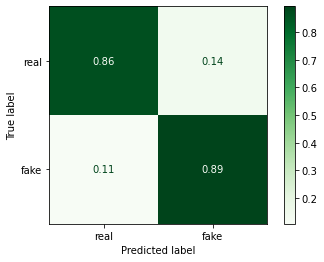

In [13]:
#TfidfVectorizer e multinomialNB
pip_tfidf_nb.fit(X_train.values, y_train)
y_pred_tfidf_nb = pip_tfidf_nb.predict(X_test.values)

# Classification report
print(classification_report(y_test, y_pred_tfidf_nb, target_names = ['real', 'fake']))
# Confusion matrix
plot_confusion_matrix(pip_tfidf_nb, X_test.values, y_test, display_labels = ['real', 'fake'], 
                      normalize = 'true', cmap=plt.cm.Greens);
# Score
accuracy['tfidfVectorizer_multinomialNB'] = accuracy_score(y_pred_tfidf_nb, y_test)

              precision    recall  f1-score   support

        Real       0.93      0.93      0.93      1766
        Fake       0.93      0.93      0.93      1835

    accuracy                           0.93      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601



C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


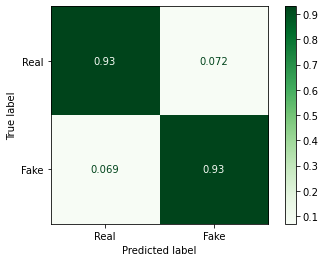

In [14]:
#TfidfVectorizer e linearSVC
pip_tfidf_svm.fit(X_train.values, y_train)
y_pred_tfidf_svm = pip_tfidf_svm.predict(X_test.values)
# Classification report
print(classification_report(y_test, y_pred_tfidf_svm, target_names = ['Real', 'Fake']))
# Confusion matrix
plot_confusion_matrix(pip_tfidf_svm, X_test.values, y_test, display_labels = ['Real', 'Fake'], 
                      normalize = 'true', cmap=plt.cm.Greens);
# Score
accuracy['tfidfVectorizer_linearSVC'] = accuracy_score(y_pred_tfidf_svm, y_test)



# Validation 1

In [15]:
validation = pip_tfidf_svm.predict(X_val.values)

NameError: name 'X_val' is not defined

In [ ]:
# Classification report
print(classification_report(y_val, validation, target_names = ['Real', 'Fake']))
# Confusion matrix
plot_confusion_matrix(pip_tfidf_svm, X_val.values, y_val, display_labels = ['Real', 'Fake'], 
                      normalize = 'true', cmap=plt.cm.Greens);

# More models

In [ ]:
bag = []
for i in range(0, len(messages)):
    bag.append(messages['text'][i])

In [ ]:
cv = CountVectorizer(max_features = 5000,ngram_range=(1,3))
X = cv.fit_transform(bag).toarray()
X.shape #(18285, 5000)
y =messages['rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)
cv.get_feature_names()[:20]

In [ ]:
cv.get_params()

In [ ]:
count_df = pd.DataFrame(X_train,columns = cv.get_feature_names())
#count_df.head()

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Multinomial Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier1 = classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
unique, counts = np.unique(pred, return_counts=True)
dict(zip(unique, counts))

# Validation 2

In [ ]:
X_val_t = cv.transform(X_val).toarray()
pred1 = classifier.predict(X_val_t)
score = metrics.accuracy_score(y_val,pred1)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_val,pred1)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=30)
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes = ['Real','Fake'])

In [ ]:
unique, counts = np.unique(pred, return_counts=True)
dict(zip(unique, counts))

# Validation 3

In [ ]:
pred2 = linear_clf.predict(X_val_t)
score = metrics.accuracy_score(y_val,pred2)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_val,pred2)
plot_confusion_matrix(cm,classes = ['Real','Fake'])

## BERT Imbau 

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from sklearn.decomposition import PCA
#import tensorflow_hub as hub
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from transformers import AutoModel, AutoTokenizer

# Using the community model
# BERT Base
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
bert = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

In [ ]:
newsu['label']=pd.get_dummies(newsu.rating)[0.0]

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(newsu['text'], newsu['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=newsu['rating'])

In [ ]:
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [ ]:
MAX_LENGHT = 15
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
        super(BERT_Arch, self).__init__()

        self.bert = bert 
      
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model  
        cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [ ]:
model = BERT_Arch(bert)

In [ ]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#compute the class weights
class_weights = compute_class_weight('balanced', classes = np.unique(train_labels), y = train_labels)

print("Class Weights:",class_weights)

In [ ]:
weights= torch.tensor(class_weights,dtype=torch.float)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [ ]:
def train():
  
    model.train()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
    
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    #print(type(labels),type(mask),type(sent_id))
    #print(sent_id)
    # clear previously calculated gradients 
    model.zero_grad()        
    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [ ]:
def evaluate():
  
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
  
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
      
        # Calculate elapsed time in minutes.
        #elapsed = format_time(time.time() - t0)
            
        # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
            batch = [t for t in batch]

            sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
        # model predictions
        preds = model(sent_id, mask)

        # compute the validation loss between actual and predicted values
        loss = cross_entropy(preds,labels)

        total_loss = total_loss + loss.item()

        preds = preds.detach().cpu().numpy()

        total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [ ]:
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

In [ ]:
with torch.no_grad():
    preds = model(test_seq, test_mask)
    preds = preds.detach().cpu().numpy()

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf = confusion_matrix(preds,test_y)
plot_confusion_matrix(conf, classes = ['Fake','Real'])

### Importing Validation set

In [ ]:
val = pd.read_csv("val_news.tsv").drop("Unnamed: 0", axis = 1)

In [ ]:
y_val = val['rating']
X_val = val.drop('rating', axis = 1)
X_val = X_val['text_processed']